importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [5]:
#loading data from csv file to pandas dataframe..
customer_data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
#finding number of rows and columns..
customer_data.shape

(200, 5)

In [6]:
# printing first 5 customer details for example....
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Choosing income and spending score columns alone..

In [ ]:
# we will take a variable X and select 3rd and 4th column(as indexing in python starts from 0)
X=customer_data.iloc[:,[3,4]].values
print(X)

choosing number of clusters


wcss->within cluster sum of squares

In [ ]:
#finding wcss value for different numbe of clusters...
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=20)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

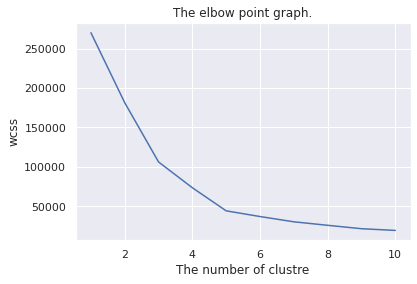

In [ ]:
#plot an elbow graph..
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph.')
plt.xlabel('The number of clustre')
plt.ylabel('wcss')
plt.show()

optimum number of clusters is 5


In [8]:
#next part is training the kmeans clusters model. here k is number of clusters, i.e k=5
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


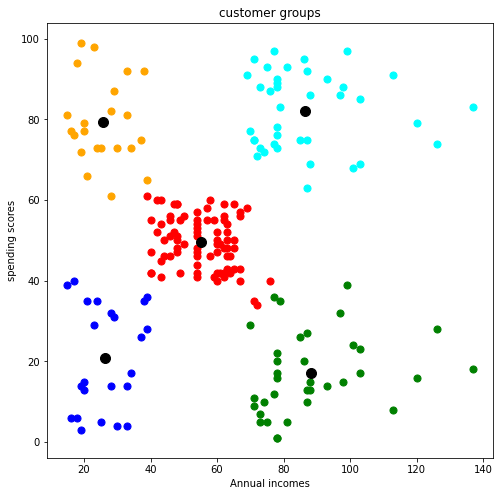

In [9]:
#ploting all the clusters and their centroids...
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='cyan',label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='orange',label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='cluster 5')
#now lets plot centroids...
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')
plt.title('customer groups')
plt.xlabel('Annual incomes')
plt.ylabel('spending scores')
plt.show()

In [10]:
#lets analyse gender and age data...
counts = customer_data.groupby(['Age','Gender']).count()
print(counts)

            CustomerID  Annual Income (k$)  Spending Score (1-100)
Age Gender                                                        
18  Female           1                   1                       1
    Male             3                   3                       3
19  Female           2                   2                       2
    Male             6                   6                       6
20  Female           2                   2                       2
...                ...                 ...                     ...
67  Male             3                   3                       3
68  Female           2                   2                       2
    Male             1                   1                       1
69  Male             1                   1                       1
70  Male             2                   2                       2

[87 rows x 3 columns]


Gender    Female  Male
category              
1              5    12
2             29    16
3             35    25
4             25    13
5             12    11
6              6    11


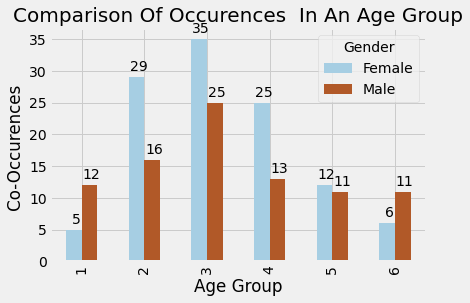

In [11]:
plt.style.use('fivethirtyeight')

Customer_data = pd.read_csv('/content/Mall_Customers.csv')
Customer_data.values

bins = np.arange(10, 100, 10)

Customer_data['category'] = np.digitize(Customer_data.Age, bins, right=True)

counts = Customer_data.groupby(['category', 'Gender']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Age Group')
plt.ylabel ('Co-Occurences ')
plt.title('Comparison Of Occurences  In An Age Group',fontsize=20)
plt.show()